In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.randint(-444, 420, 300)

In [3]:
x = list(set(x))

In [4]:
x = np.array(x)

In [5]:
x.shape

(259,)

In [6]:
u = x.mean()
std = x.std()
x = (x - u)/std

In [7]:
y_gt = []
for i in x:
    y_gt.append(8 * i + 3)

In [8]:
y_gt = np.array(y_gt)

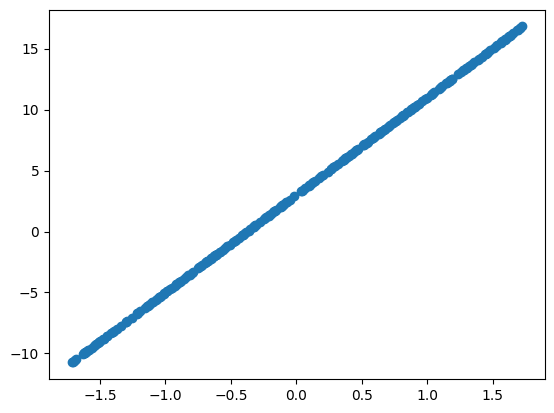

In [9]:
plt.scatter(x, y_gt)

In [10]:
x.mean()

2.743408246177993e-17

In [11]:
def hypothesis(x, weight):
    
    y_pred = weight[0] + weight[1] * x[1]
    return y_pred

In [12]:
def loss_func(x, y, weight):
    
    error = 0
    for i in range(x.shape[0]):
        
        y_pred = hypothesis(x[i], weight)
        
        error += (y_pred - y[i])**2
    return error/x.shape[0]

In [13]:
def gradient(x, y, weight):
    
    grad = np.zeros((2, ))
    
    for i in range(x.shape[0]):
        
        y_pred = hypothesis(x[i], weight)

        grad[0] += (y_pred - y[i]) * x[i][0]
        grad[1] += (y_pred - y[i]) * x[i][1]
        
    return grad/x.shape[0]

In [14]:
def gradient_descent(x, y, learning_rate = 0.03):
    
    weight = np.zeros((2, ))
    
    cost = []
    
    epoch = 600
    
    for i in range(epoch):
        grad = gradient(x, y, weight)
        
        loss = loss_func(x, y, weight)
        cost.append(loss)
        
        weight[0] = weight[0] - learning_rate * grad[0]
        weight[1] = weight[1] - learning_rate * grad[1]
        
    return cost, weight

In [15]:
x = x.reshape((-1, 1))
one = np.ones((x.shape[0], 1))
print(one.shape)
x = np.hstack((one, x))

(259, 1)


In [16]:
x.shape

(259, 2)

In [17]:
x[0]

array([1.        , 0.06878834])

In [18]:
y_gt = y_gt.reshape((-1, 1))
cost, weight = gradient_descent(x, y_gt)

In [19]:
y_gt.shape

(259, 1)

In [20]:
weight

array([2.99999997, 7.99999991])

In [21]:
cost

[array([73.]),
 array([68.6857]),
 array([64.62637513]),
 array([60.80695636]),
 array([57.21326524]),
 array([53.83196126]),
 array([50.65049235]),
 array([47.65704825]),
 array([44.8405167]),
 array([42.19044217]),
 array([39.69698703]),
 array([37.3508951]),
 array([35.1434572]),
 array([33.06647888]),
 array([31.11224998]),
 array([29.273516]),
 array([27.54345121]),
 array([25.91563324]),
 array([24.38401932]),
 array([22.94292378]),
 array([21.58699698]),
 array([20.31120546]),
 array([19.11081322]),
 array([17.98136415]),
 array([16.91866553]),
 array([15.9187724]),
 array([14.97797295]),
 array([14.09277475]),
 array([13.25989176]),
 array([12.47623216]),
 array([11.73888684]),
 array([11.04511863]),
 array([10.39235212]),
 array([9.77816411]),
 array([9.20027461]),
 array([8.65653838]),
 array([8.14493696]),
 array([7.66357119]),
 array([7.21065413]),
 array([6.78450447]),
 array([6.38354026]),
 array([6.00627303]),
 array([5.65130229]),
 array([5.31731032]),
 array([5.0030572

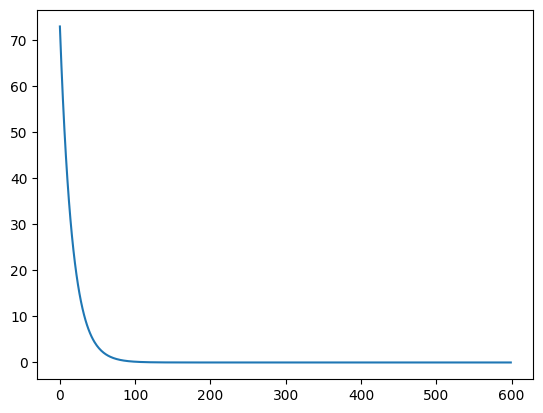

In [22]:
plt.plot(cost)